# Classification
In classification, the goal is to predict class label, which is a choice from a predefined of possibilities.
Classification is divided into binary classification(have positive and negative classes) and multiclass classification. You can image binary classification as classification that gives answers to yes/no questions.

In [49]:
# Import and setup libraries.
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
import sklearn as sl
import warnings

%matplotlib inline

warnings.filterwarnings('ignore')
plt.rc("font", family="Verdana")

## Iris example:

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
y_train shape: (112,)
y_test shape: (38,)


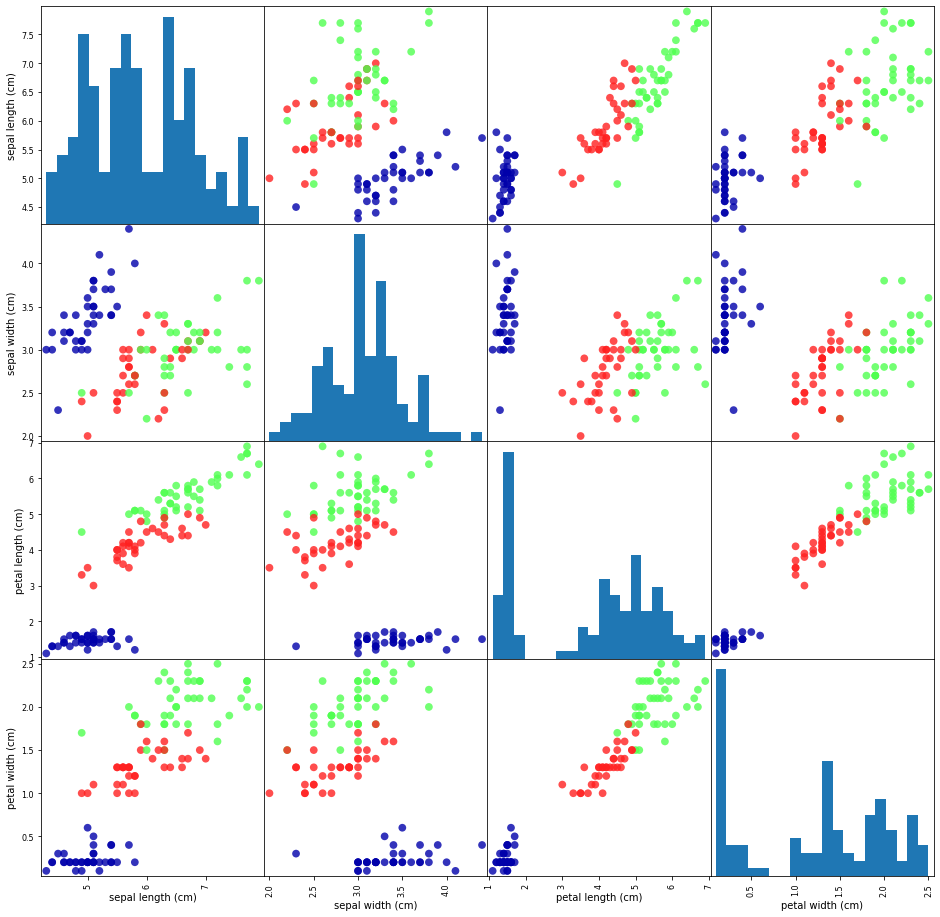

In [54]:
iris_ds = sl.datasets.load_iris()

X_train, X_test, y_train, y_test = sl.model_selection.train_test_split(
    iris_ds["data"], 
    iris_ds["target"], 
    random_state=0
)

# 'train_test_split' splits into 75% of the rows for train and 25% of the rows for test.
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Pair plot of the iris data.
grr = pd.plotting.scatter_matrix(
    pd.DataFrame(X_train, columns=iris_ds.feature_names),
    c=y_train,
    figsize=(16, 16),
    marker="o",
    hist_kwds={"bins": 20},
    s=60,
    alpha=0.8,
    cmap=mglearn.cm3
)

### k-nearest neighbors:

In [59]:
# Building a knn model.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Making prediction.
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print(f"Predicted target name: {iris_ds['target_names'][prediction]}")
      
# Evaluating the model.
y_pred = knn.predict(X_test)
print(f"Score: {np.mean(y_pred == y_test)}")
print(f"Score using 'score' method of knn object:{knn.score(X_test, y_test)}")

Predicted target name: ['setosa']
Score: 0.9736842105263158
Score using 'score' method of knn object:0.9736842105263158
